In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import random
from sklearn.model_selection import train_test_split

dataset_path = 'lab_test_2_dataset'

# Define a function to load and preprocess images

def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (32, 32))  # Resize to your desired image size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Load dataset paths and corresponding labels
image_paths = []
ages = []
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        age = int(folder)

        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            image_paths.append(file_path)
            ages.append(age)


# Shuffle the dataset
data = list(zip(image_paths, ages))
random.shuffle(data)
image_paths, ages = zip(*data)

# Split the dataset into train, validation, and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, ages, test_size=0.2, random_state=42)
val_paths, test_paths, val_labels, test_labels = train_test_split(
    test_paths, test_labels, test_size=0.5, random_state=42)

# # Create TensorFlow datasets
# train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
# val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

# Load and preprocess images in parallel
# train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# val_dataset = val_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# test_dataset = test_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# # Shuffle and batch the datasets
# batch_size = 128
# train_dataset = train_dataset.shuffle(buffer_size=len(train_paths)).batch(batch_size)
# val_dataset = val_dataset.batch(batch_size)
# test_dataset = test_dataset.batch(batch_size)

# # Print dataset sizes
# print(f"Overall dataset size: {len(image_paths)}")
# print(f"Training dataset size: {len(train_paths)}")
# print(f"Validation dataset size: {len(val_paths)}")
# print(f"Testing dataset size: {len(test_paths)}")

In [18]:
print(train_labels)

[4, 48, 81, 30, 74, 67, 72, 8, 9, 61, 1, 2, 1, 23, 4, 10, 4, 69, 28, 4, 40, 3, 60, 85, 61, 1, 53, 10, 56, 2, 21, 8, 9, 29, 1, 65, 50, 5, 84, 26, 3, 37, 27, 30, 4, 13, 76, 1, 39, 52, 18, 35, 16, 9, 41, 24, 27, 22, 20, 85, 8, 1, 16, 30, 1, 2, 26, 1, 69, 16, 1, 61, 3, 71, 17, 92, 2, 20, 19, 85, 92, 14, 40, 16, 1, 53, 57, 15, 42, 54, 9, 50, 41, 34, 51, 13, 4, 15, 8, 13, 15, 23, 8, 53, 78, 18, 1, 21, 1, 35, 29, 3, 35, 3, 1, 31, 10, 58, 25, 35, 1, 84, 60, 26, 49, 62, 68, 8, 1, 35, 3, 36, 30, 1, 6, 1, 5, 60, 2, 36, 19, 77, 1, 49, 35, 90, 50, 16, 47, 3, 8, 2, 16, 77, 3, 26, 17, 3, 8, 1, 73, 1, 26, 38, 72, 4, 71, 5, 47, 50, 38, 38, 1, 5, 4, 1, 60, 3, 1, 65, 9, 60, 27, 22, 13, 34, 76, 1, 16, 58, 36, 70, 59, 48, 31, 71, 11, 39, 42, 58, 9, 25, 3, 30, 85, 49, 1, 9, 78, 50, 27, 53, 42, 5, 70, 23, 9, 51, 60, 26, 16, 12, 8, 7, 18, 1, 3, 18, 75, 1, 8, 16, 37, 3, 50, 60, 30, 1, 27, 5, 50, 31, 90, 4, 83, 2, 49, 45, 1, 24, 1, 1, 56, 27, 21, 48, 30, 90, 35, 3, 34, 16, 15, 2, 42, 25, 26, 5, 85, 65, 21, 1, 5

In [34]:
import tensorflow as tf

def load_and_preprocess_image(file_path, label):
    # Read the image file
    img = tf.io.read_file(file_path)
    # Decode the image into a tensor
    img = tf.image.decode_image(img, channels=3)
    # Adjust channels as per your image format
    # Normalize pixel values to [0, 1]
    img = tf.image.convert_image_dtype(img, tf.float32)

    return img, label

# Create a dataset containing file paths and one-hot encoded labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_dataset = train_dataset.map(load_and_preprocess_image)

val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_dataset = val_dataset.map(load_and_preprocess_image)

# Print shapes of individual samples in the dataset
for image, label in train_dataset.take(1):
    print("Train Images Shape:", image.shape)
    print("Train Labels Shape:", label.shape)

for image, label in val_dataset.take(1):
    print("Validation Images Shape:", image.shape)
    print("Validation Labels Shape:", label.shape)

Train Images Shape: (32, 32, 3)
Train Labels Shape: ()
Validation Images Shape: (32, 32, 3)
Validation Labels Shape: ()


In [4]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths)).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [13]:
print(train_dataset.as_numpy_iterator().next()[1].shape)

()


In [6]:
# Print shapes of individual samples in the dataset
for image, label in train_dataset.take(1):  # Take one batch for example
    print("Train Images Shape:", image.shape)
    print("Train Labels Shape:", label.shape)

for image, label in val_dataset.take(1):  # Take one batch for example
    print("Validation Images Shape:", image.shape)
    print("Validation Labels Shape:", label.shape)

Train Images Shape: (32, 32, 3)
Train Labels Shape: ()
Validation Images Shape: (32, 32, 3)
Validation Labels Shape: ()


In [5]:
model = Sequential()
#First Convolutional layer
model.add(Conv2D(filters = 56,kernel_size = (3,3), activation = 'relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

#second Convolutional layer
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

#Hidden Layer
model.add(Dense(units = 64, activation = 'relu'))

#Output Layer
model.add(Dense(units = 111 , activation = 'softmax'))

c:\Users\91824\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy','accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 56)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 56)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │        16,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 111)            │         7,215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,735 (385.68 KB)

 Trainable params: 98,735 (385.68 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
hist = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=string)
  • training=True
  • mask=None

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


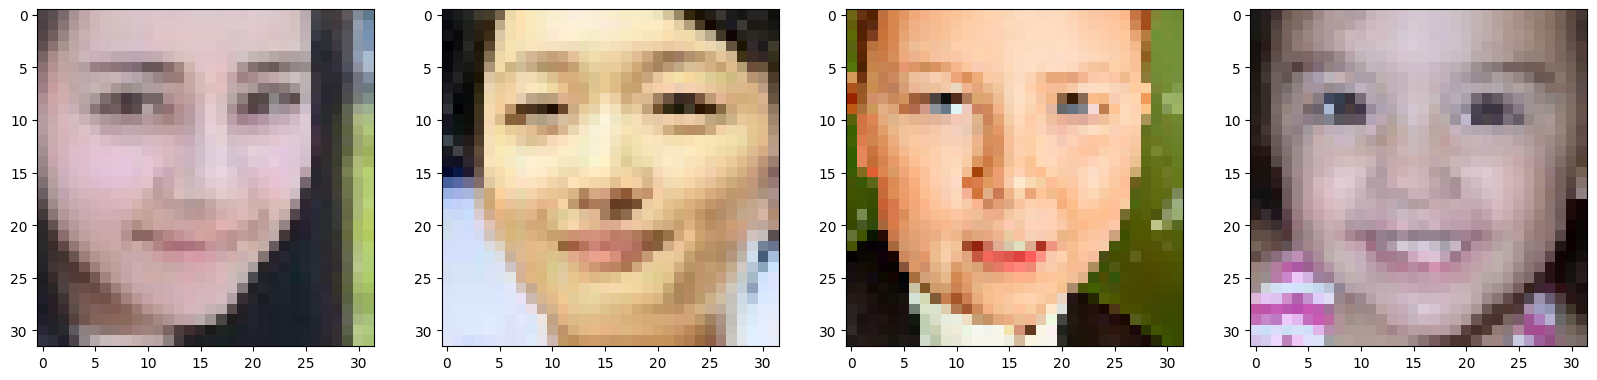

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(test_dataset.as_numpy_iterator().next()[0][:4]):
    ax[idx].imshow(img)
    # ax[idx].title.set_text(test_dataset[1][idx])
    print(img.shape)

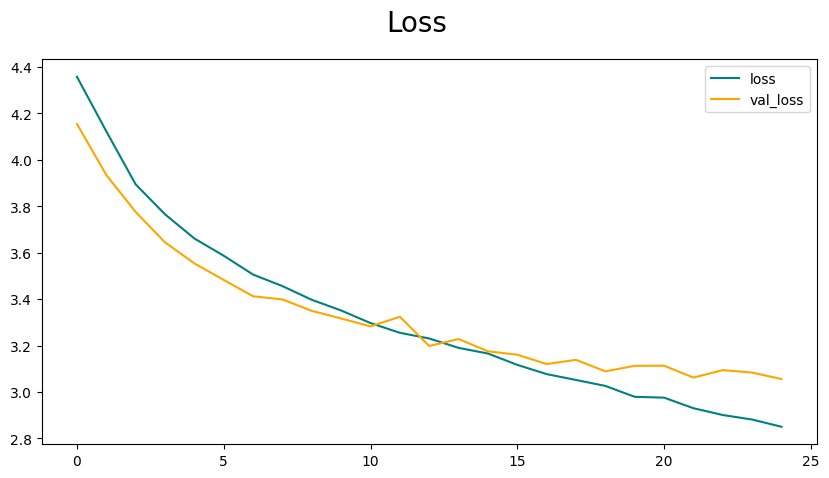

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='loss',color='teal')
plt.plot(history.history['val_loss'], label='val_loss',color='orange')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

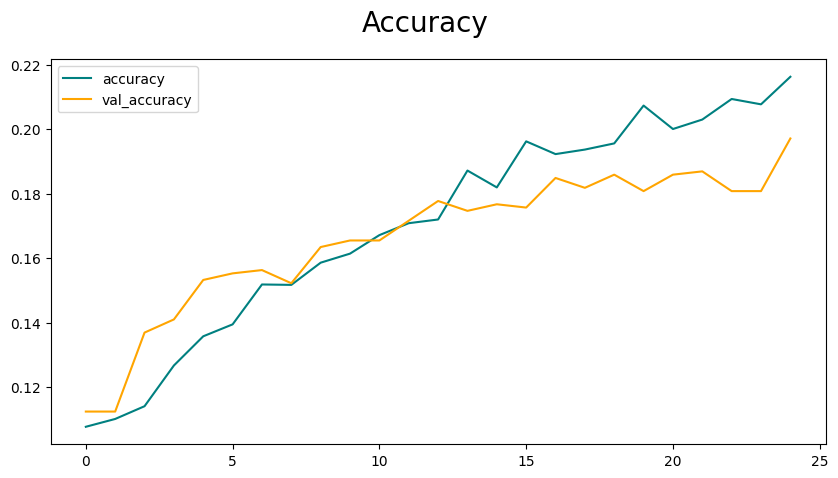

In [12]:
fig = plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy',color='teal')
plt.plot(history.history['val_accuracy'], label='val_accuracy',color='orange')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [36]:
test_loss, test_acc = cnn_model.evaluate(test_dataset, verbose=2)
print('\nTest accuracy:', test_acc)
predicted_ages = cnn_model.predict(test_dataset)

8/8 - 0s - loss: 3.0764 - accuracy: 0.2084 - 235ms/epoch - 29ms/step

Test accuracy: 0.20837590098381042
8/8 [==============================] - 0s 23ms/step


(979,)


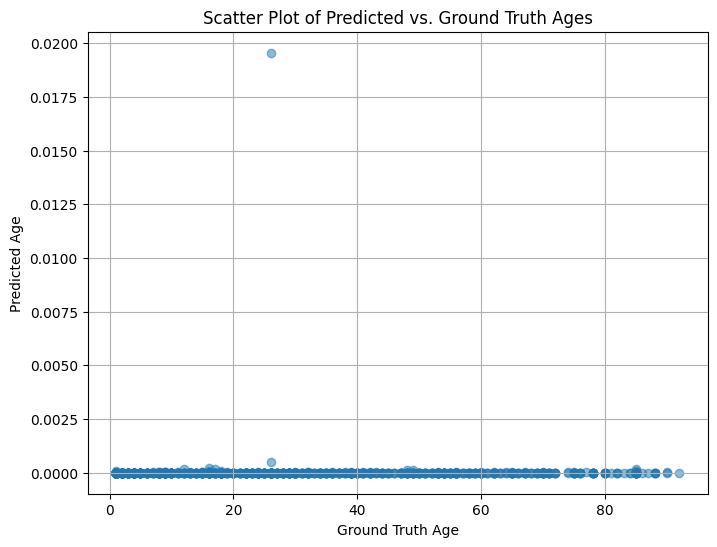

In [40]:
predicted_ages = np.array(predicted_ages)
print(predicted_ages[:, 0].shape)
ground_truth_ages = np.array(test_labels)

plt.figure(figsize=(8, 6))
plt.scatter(x=ground_truth_ages, y=predicted_ages[:,0], alpha=0.5)
plt.xlabel('Ground Truth Age')
plt.ylabel('Predicted Age')
plt.title('Scatter Plot of Predicted vs. Ground Truth Ages')
plt.grid(True)
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

pre = Precision()
rec = Recall()
acc = CategoricalAccuracy()

for x, y in test_dataset.as_numpy_iterator():
    y_pred = cnn_model(x)
    y_one_hot = to_categorical(y, num_classes=111)  # assuming you have 111 classes
    pre.update_state(y_one_hot, y_pred)
    rec.update_state(y_one_hot, y_pred)
    acc.update_state(y_one_hot, y_pred)

print('Precision: ', pre.result().numpy())
print('Recall: ', rec.result().numpy())
print('Accuracy: ', acc.result().numpy())

Precision:  0.74336284
Recall:  0.08580184
Accuracy:  0.2083759


In [ ]:
predicted_ages = np.array(predicted_ages)
print(predicted_ages[:, 0].shape)

plt.figure(figsize=(8, 6))
plt.scatter(x=ground_truth_ages, y=predicted_ages[:,0], alpha=0.5)
plt.xlabel('Ground Truth Age')
plt.ylabel('Predicted Age')
plt.title('Scatter Plot of Predicted vs. Ground Truth Ages')
plt.grid(True)
plt.show()